In [1]:
import numpy as np
import pandas as pd
from torch_geometric.utils import homophily
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

from dataset import *

In [16]:
res_h = []
h_type = []
data = []

for data_name in ['DD', 'ENZYMES', 'KKI', 'OHSU', 'Peking_1', 'PROTEINS', 'PROTEINS_full']:
# for data_name in ['ENZYMES']:
    data_list = load_TUDDataset(data_name)
    
    res_data_h_edge = [homophily(data.edge_index, y=data.node_y, method='edge') for data in data_list]
    data.extend([data_name]*len(data_list))
    h_type.extend(['edge_h']*len(data_list))
    res_h.extend(res_data_h_edge)
    
    res_data_h_node = [homophily(data.edge_index, y=data.node_y, method='node') for data in data_list]
    data.extend([data_name]*len(data_list))
    h_type.extend(['node_h']*len(data_list))
    res_h.extend(res_data_h_node)

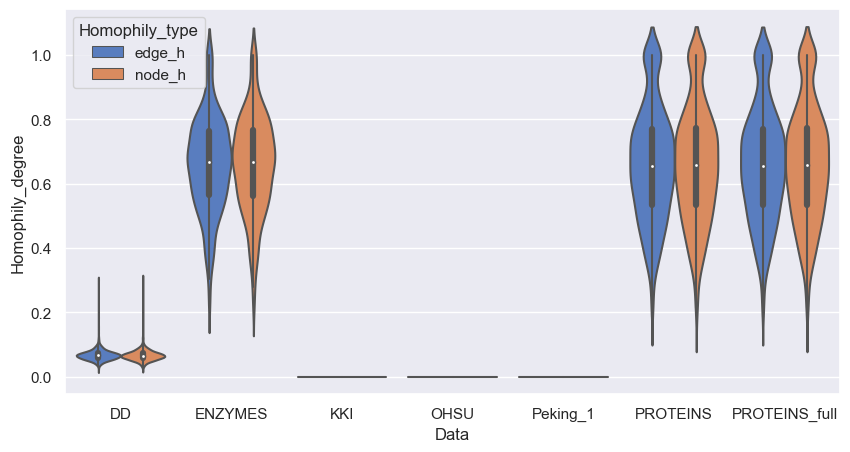

In [17]:
df = pd.DataFrame({
    'Data': data,
    'Homophily_degree': res_h,
    'Homophily_type': h_type,
})

sns.set(rc={'figure.figsize':(10, 5)})

ax = sns.violinplot(
    x="Data", y="Homophily_degree", hue="Homophily_type",
    data=df, palette="muted"
)
plt.show()

### Why do *KKI* *IHSU* and *Peking_1* have so low h?
Mainly because their nodes have lots of different node labels (each dataset has 189 node classes).